In [17]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
# Reading data from the data given in the link
url = "http://bit.ly/w-data"
dataset= pd.read_csv(url)
print("Data Imported Successfully!")
dataset.head(15)

Data Imported Successfully!


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [18]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


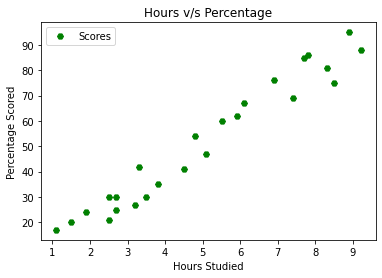

In [19]:
dataset.plot(x='Hours', y='Scores', style='H', color='green')
plt.title('Hours v/s Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')
plt.show()

In [20]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

In [21]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0)

In [22]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)        # fit() is used to fit the essential training data to the training part of the modeling process
print('Training Complete!')

Training Complete!


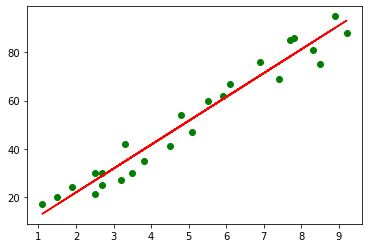

In [23]:
line = regressor.coef_*X+regressor.intercept_
# Plotting for the test data
plt.scatter(X, y, color= 'green')
plt.plot(X, line, color='red');
plt.show()

In [24]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [25]:
# Comparing Actual vs Predicted
dataset = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
dataset

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [26]:
hours = np.array([9.25])
hours = hours.reshape(-1,1)
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737538


In [27]:
#The final step is to evaluate the performance of algorithm.
#This step is particularly important to compare how well different algorithms perform on a particular dataset. 
#For simplicity here, we have chosen the mean square error. 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
